In [2]:
import pandas as pd
import numpy as np
import requests
import requests_cache
import time
import lxml.html as lx
import itertools
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

In [3]:
so = pd.read_csv('survey_results_public.csv')

/Users/melissaknoch/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
bad_cols = ['Respondent', 'Hobby', 'AssessJob1', 'AssessJob2', 'AssessJob3', 'AssessJob4', 'AssessJob5', 'AssessJob6', 'AssessJob7',
           'AssessJob8', 'AssessJob9', 'AssessJob10', 'AssessBenefits1', 'AssessBenefits2', 'AssessBenefits3',
           'AssessBenefits4', 'AssessBenefits5', 'AssessBenefits6', 'AssessBenefits7', 'AssessBenefits8',
           'AssessBenefits9', 'AssessBenefits10', 'AssessBenefits11', 'JobContactPriorities1', 'JobContactPriorities2',
           'JobContactPriorities3', 'JobContactPriorities4', 'JobContactPriorities5', 'JobEmailPriorities1',
            'JobEmailPriorities2', 'JobEmailPriorities3', 'JobEmailPriorities4', 'JobEmailPriorities5', 
            'JobEmailPriorities6', 'JobEmailPriorities7', 'UpdateCV', 'AgreeDisagree1', 'AgreeDisagree2', 
            'AgreeDisagree3', 'AdBlocker', 'AdBlockerDisable', 'AdBlockerReasons', 'AdsAgreeDisagree1', 
            'AdsAgreeDisagree2', 'AdsAgreeDisagree3', 'AdsActions', 'AdsPriorities1', 'AdsPriorities2', 
            'AdsPriorities3', 'AdsPriorities4', 'AdsPriorities5', 'AdsPriorities6', 'AdsPriorities7', 
            'StackOverflowRecommend', 'StackOverflowVisit', 'StackOverflowHasAccount', 'StackOverflowParticipate',
            'StackOverflowDevStory', 'StackOverflowJobs', 'StackOverflowJobsRecommend', 'StackOverflowConsiderMember', 'HypotheticalTools1',
            'HypotheticalTools2', 'HypotheticalTools3', 'HypotheticalTools4', 'HypotheticalTools5', 'MilitaryUS', 
            'SurveyTooLong', 'SurveyEasy']

In [5]:
so = so.drop(bad_cols, axis = 1)

In [45]:
for pos, value in enumerate(so.columns.values):
    print(pos, value)

0 OpenSource
1 Country
2 Student
3 Employment
4 FormalEducation
5 UndergradMajor
6 CompanySize
7 DevType
8 YearsCoding
9 YearsCodingProf
10 JobSatisfaction
11 CareerSatisfaction
12 HopeFiveYears
13 JobSearchStatus
14 LastNewJob
15 Currency
16 Salary
17 SalaryType
18 ConvertedSalary
19 CurrencySymbol
20 CommunicationTools
21 TimeFullyProductive
22 EducationTypes
23 SelfTaughtTypes
24 TimeAfterBootcamp
25 HackathonReasons
26 LanguageWorkedWith
27 LanguageDesireNextYear
28 DatabaseWorkedWith
29 DatabaseDesireNextYear
30 PlatformWorkedWith
31 PlatformDesireNextYear
32 FrameworkWorkedWith
33 FrameworkDesireNextYear
34 IDE
35 OperatingSystem
36 NumberMonitors
37 Methodology
38 VersionControl
39 CheckInCode
40 AIDangerous
41 AIInteresting
42 AIResponsible
43 AIFuture
44 EthicsChoice
45 EthicsReport
46 EthicsResponsible
47 EthicalImplications
48 WakeTime
49 HoursComputer
50 HoursOutside
51 SkipMeals
52 ErgonomicDevices
53 Exercise
54 Gender
55 SexualOrientation
56 EducationParents
57 RaceEthni

In [7]:
so["Salary"] = so['Salary'].str.replace(',', '')
so['Salary'] = so['Salary'].astype(float)

In [8]:
so.to_csv('so_2018.csv', index = False)

# Questions:

- Analyze industry data job postings (data analysts, data scientists, data engineers, etc…)

- Identify the requirements (skills, experiences, education, etc…)

- Identify salary ranges and benefits.

- How does location and the geographic region influence the components we list above?

- What kinds of software and technologies are workers in this field using?

In [12]:
so['Employment'].unique()

array(['Employed part-time', 'Employed full-time',
       'Independent contractor, freelancer, or self-employed',
       'Not employed, and not looking for work',
       'Not employed, but looking for work', nan, 'Retired'], dtype=object)

In [13]:
so['FormalEducation'].unique()

array(['Bachelor’s degree (BA, BS, B.Eng., etc.)', 'Associate degree',
       'Some college/university study without earning a degree',
       'Master’s degree (MA, MS, M.Eng., MBA, etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       nan, 'Primary/elementary school',
       'Professional degree (JD, MD, etc.)',
       'I never completed any formal education',
       'Other doctoral degree (Ph.D, Ed.D., etc.)'], dtype=object)

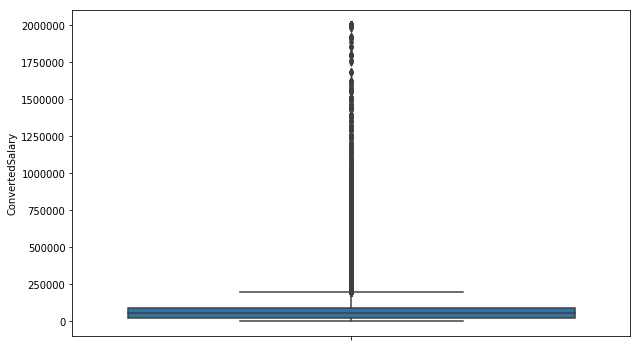

In [68]:
plt.figure(figsize = (10,6))
sns.boxplot('ConvertedSalary', data = so, orient = 'v')

In [ ]:
sns.barplot(x = 'FormalEducation', y = 'ConvertedSalary' data = so)